In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import folium

In [2]:
# Load the data from your CSV file
cities = pd.read_csv("minard_chard/cities.csv")
temperatures = pd.read_csv("minard_chard/temperature.csv")
troops = pd.read_csv("minard_chard/troops.csv")

In [3]:
cities.head()

,long,lat,city
0,24.0,55.0,Kowno
1,25.3,54.7,Wilna
2,26.4,54.4,Smorgoni
3,26.8,54.3,Moiodexno
4,27.7,55.2,Gloubokoe


In [4]:
# Convert the DataFrame to a GeoDataFrame
geometry = gpd.points_from_xy(cities["long"], cities["lat"])
gdf = gpd.GeoDataFrame(cities, geometry=geometry)

# Set the CRS of the GeoDataFrame to EPSG 4326 (WGS84)
gdf = gdf.set_crs(epsg=4326)

# Display the cities on a map with OpenStreetMap basemap
gdf.explore(column="city", legend=True, marker_kwds=dict(icon=folium.DivIcon()))

In [5]:
# Convert the cities DataFrame to a GeoDataFrame
geometry = gpd.points_from_xy(cities["long"], cities["lat"])
gdf = gpd.GeoDataFrame(cities, geometry=geometry)

# Set the CRS of the GeoDataFrame to EPSG 4326 (WGS84)
gdf = gdf.set_crs(epsg=4326)

# Merge the temperature data with the cities GeoDataFrame
gdf = gdf.merge(temperatures, on="long")

# Create a Folium map centered on the first city in the GeoDataFrame
m = folium.Map(location=[gdf["lat"].mean(), gdf["long"].mean()], zoom_start=4)

# Add the cities to the map as markers
for idx, row in gdf.iterrows():
    folium.Marker(location=[row.lat, row.long], popup=f"Temperature: {row.temp}°C").add_to(m)

# Display the map
m

In [6]:
# Convert the DataFrame to a GeoDataFrame
geometry = gpd.points_from_xy(cities["long"], cities["lat"])
gdf = gpd.GeoDataFrame(cities, geometry=geometry)

# Set the CRS of the GeoDataFrame to EPSG 4326 (WGS84)
gdf = gdf.set_crs(epsg=4326)

# Display the cities on a map with OpenStreetMap basemap
gdf.explore(column="city", legend=True, marker_kwds=dict(icon=folium.DivIcon()))


# Merge the temperature data with the cities GeoDataFrame
gdf = gdf.merge(temperatures, on="long")

# Create a Folium map centered on the mean latitude and longitude of all the cities in the GeoDataFrame
m = folium.Map(location=[gdf["lat"].mean(), gdf["long"].mean()], zoom_start=4)

# Add the cities to the map as markers with temperature information
for idx, row in gdf.iterrows():
    folium.Marker(location=[row.lat, row.long], popup=f"Temperature: {row.temp}°C").add_to(m)

# Display the map
m

In [7]:
troops = troops.sort_values(by=["division", "survivors"], ascending=False)

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=troops, x='long', y='lat', size='survivors', hue='direction', sizes=(1, 75), ax=ax)
ax.set_aspect("equal")
ax.set_xlim(troops['long'].min(), troops['long'].max())
ax.set_ylim(troops['lat'].min(), troops['lat'].max())
ax.legend().remove()
plt.savefig("troops_first_try.png")
plt.close()

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=troops, x='long', y='lat', size='survivors', hue='direction', sizes=(1, 75), ax=ax)
ax.set_aspect("equal")
ax.set_xlim(troops['long'].min(), troops['long'].max())
ax.set_ylim(troops['lat'].min(), troops['lat'].max())
ax.legend().remove()
plt.savefig("troops.png")
plt.close()

In [10]:
troops_text = troops.iloc[::2, :].copy()
troops_text["long"] += 0.13 * (troops_text["division"])
troops_text["lat"] += troops_text["direction"].replace({"A": 0.35, "R": -0.21})

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=troops_text, x='long', y='lat', size='survivors', ax=ax)
ax.set_aspect("equal")
ax.set_xlim(troops_text['long'].min(), troops_text['long'].max())
ax.set_ylim(troops_text['lat'].min(), troops_text['lat'].max())
plt.savefig("troops_text.png")
plt.close()

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=cities, x='long', y='lat', ax=ax)
ax.set_aspect("equal")
ax.set_xlim(cities['long'].min(), cities['long'].max())
ax.set_ylim(cities['lat'].min(), cities['lat'].max())
plt.savefig("cities.png")
plt.close()

KeyError: 'label'

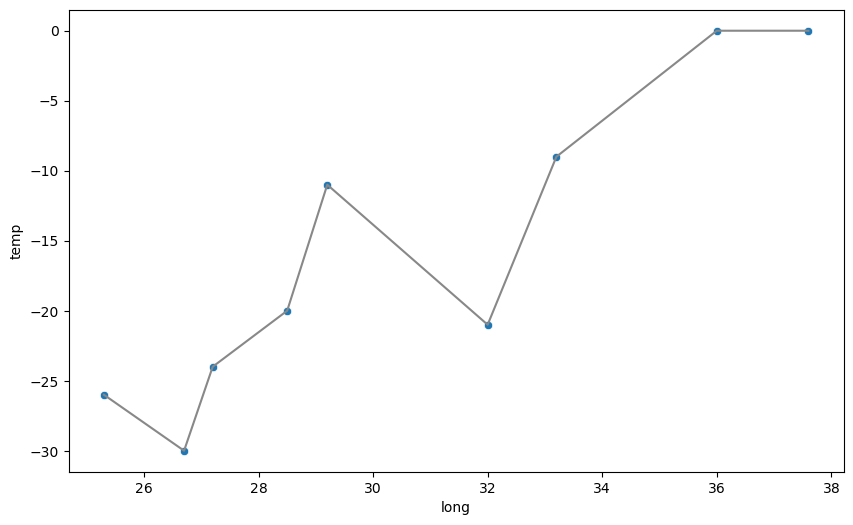

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=temperatures, x='long', y='temp', color="#888888", ax=ax)
scatter = sns.scatterplot(data=temperatures, x='long', y='temp', ax=ax)

# Add text labels to the scatter plot
for i, row in temperatures.iterrows():
    if pd.notnull(row["temp"]):
        scatter.annotate(row["label"], xy=(row["long"], row["temp"]), xytext=(5, 5), textcoords="offset points")

plt.savefig("temperature.png")
plt.close()

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 10))
sns.scatterplot(data=troops, x='long', y='lat', size='survivors', hue='direction', sizes=(1, 75), ax=axes[0])
axes[0].set_aspect("equal")
axes[0].set_xlim(troops['long'].min(), troops['long'].max())
axes[0].set_ylim(troops['lat'].min(), troops['lat'].max())
axes[0].legend().remove()

sns.lineplot(data=temperatures, x='long', y='temp', color="#888888", ax=axes[1])
scatter = sns.scatterplot(data=temperatures, x='long', y='temp', ax=axes[1])

# Add text labels to the scatter plot
for i, row in temperatures.iterrows():
    if pd.notnull(row["temp"]):
        scatter.annotate(row["label"], xy=(row["long"], row["temp"]), xytext=(5, 5), textcoords="offset points")

plt.tight_layout()
plt.savefig("minard_chart.png")


In [ ]:
# Create a Folium map centered on the mean latitude and longitude of all the troops
m = folium.Map(location=[troops["lat"].mean(), troops["long"].mean()], zoom_start=6)

# Add the troops to the map as markers with information
for idx, row in troops.iterrows():
    folium.Marker(location=[row.lat, row.long], popup=f"Survivors: {row.survivors}, Direction: {row.direction}, Division: {row.division}").add_to(m)

# Display the map
m

In [ ]:
# Merge the temperature data with the troops DataFrame
troops = troops.merge(temperatures, on=["long", "lat"])

# Create a Folium map centered on the mean latitude and longitude of all the troops
m = folium.Map(location=[troops["lat"].mean(), troops["long"].mean()], zoom_start=6)

# Add the troops to the map as markers with information and temperature using a colormap
folium.Choropleth(
    geo_data=troops,
    name="Temperature",
    data=troops,
    columns=["lat", "long", "temp"],
    key_on="feature.properties.lat",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Temperature (°C)",
).add_to(m)

for idx, row in troops.iterrows():
    folium.Marker(location=[row.lat, row.long], popup=f"Survivors: {row.survivors}, Direction: {row.direction}, Division: {row.division}, Temperature: {row.temp}°C").add_to(m)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Display the map
m

In [14]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Read the Minard chard dataset
cities = pd.read_csv("minard_chard/cities.csv")
temperatures = pd.read_csv("minard_chard/temperature.csv")
troops = pd.read_csv("minard_chard/troops.csv")

# Create a geopandas dataframe from the city data
city_gdf = gpd.GeoDataFrame(cities, geometry=gpd.points_from_xy(cities['Longitude'], cities['Latitude']))

# Add temperature and troops columns to the geopandas dataframe
city_gdf['Temperature'] = temperatures['Temperature']
city_gdf['Troops'] = troops['Troops']

# Create a colormap for the temperature column
cmap = plt.cm.jet
norm = plt.Normalize(min(city_gdf['Temperature']), max(city_gdf['Temperature']))

# Create a figure
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the cities
city_gdf.plot(ax=ax, marker='o', color=cmap(norm(city_gdf['Temperature'])), markersize=10)

# Add a title and legend
ax.set_title('Temperature and Troops in the Minard Chard Dataset')
ax.legend([f'Temperature: {city_gdf["Temperature"].mean():.1f}°C'], loc='upper left')

# Show the plot
plt.show()

KeyError: 'Longitude'

In [17]:
import pandas as pd

cities = pd.read_csv("minard_chard/cities.csv")
temperatures = pd.read_csv("minard_chard/temperature.csv")
troops = pd.read_csv("minard_chard/troops.csv")

In [18]:
# Merge the DataFrames together
df = cities.merge(temperatures, on=['long', 'lat'], how='outer')
df = df.merge(troops, on=['long', 'lat'], how='outer')

KeyError: 'lat'